Importing all the libraries required for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Observing the data

In [2]:
#The data string is of latin 1 encoding instead of UTF-8 encoding
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
df = pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9504\930122005.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")


Data has been successfully imported


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.shape

(181691, 135)

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
for i in df.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

#### Cleaning the data

In [7]:
df = df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

iyear  imonth  iday         country_txt                   region_txt  \
0   1970       7     2  Dominican Republic  Central America & Caribbean   
1   1970       0     0              Mexico                North America   
2   1970       1     0         Philippines               Southeast Asia   
3   1970       1     0              Greece               Western Europe   
4   1970       1     0               Japan                    East Asia   

  provstate           city   latitude   longitude location summary  \
0       NaN  Santo Domingo  18.456792  -69.951164      NaN     NaN   
1   Federal    Mexico city  19.371887  -99.086624      NaN     NaN   
2    Tarlac        Unknown  15.478598  120.599741      NaN     NaN   
3    Attica         Athens  37.997490   23.762728      NaN     NaN   
4   Fukouka        Fukouka  33.580412  130.396361      NaN     NaN   

                  attacktype1_txt                targtype1_txt  \
0                   Assassination  Private Citizens & Property   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                   Assassination          Journalists & Media   
3               Bombing/Explosion      Government (Diplomatic)   
4  Facility/Infrastructure Attack      Government (Diplomatic)   

                                gname motive weaptype1_txt  nkill  nwound  \
0                              MANO-D    NaN       Unknown    1.0     0.0   
1  23rd of September Communist League    NaN       Unknown    0.0     0.0   
2                             Unknown    NaN       Unknown    1.0     0.0   
3                             Unknown    NaN    Explosives    NaN     NaN   
4                             Unknown    NaN    Incendiary    NaN     NaN   

  addnotes  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [8]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"Province/State","city":"City","latitude":"Latitude","longitude":"Longitude","location":"Location","summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type","gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type","nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [9]:
df.head()

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

  Province/State           City   Latitude   Longitude Location Summary  \
0            NaN  Santo Domingo  18.456792  -69.951164      NaN     NaN   
1        Federal    Mexico city  19.371887  -99.086624      NaN     NaN   
2         Tarlac        Unknown  15.478598  120.599741      NaN     NaN   
3         Attica         Athens  37.997490   23.762728      NaN     NaN   
4        Fukouka        Fukouka  33.580412  130.396361      NaN     NaN   

                      Attack Type                  Target Type  \
0                   Assassination  Private Citizens & Property   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                   Assassination          Journalists & Media   
3               Bombing/Explosion      Government (Diplomatic)   
4  Facility/Infrastructure Attack      Government (Diplomatic)   

                           Group Name Motive Weapon Type  Killed  Wounded  \
0                              MANO-D    NaN     Unknown     1.0      0.0   
1  23rd of September Communist League    NaN     Unknown     0.0      0.0   
2                             Unknown    NaN     Unknown     1.0      0.0   
3                             Unknown    NaN  Explosives     NaN      NaN   
4                             Unknown    NaN  Incendiary     NaN      NaN   

  Add Notes  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [10]:
df.shape

(181691, 19)

In [11]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [12]:
df["Killed"]=df["Killed"].fillna(0)
df["wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [13]:
df.describe()

Year          Month            Day       Latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          Longitude         Killed        Wounded        wounded  \
count  1.771340e+05  181691.000000  165380.000000  181691.000000   
mean  -4.586957e+02       2.266860       3.167668       2.883296   
std    2.047790e+05      11.227057      35.949392      34.309747   
min   -8.618590e+07       0.000000       0.000000       0.000000   
25%    4.545640e+00       0.000000       0.000000       0.000000   
50%    4.324651e+01       0.000000       0.000000       0.000000   
75%    6.871033e+01       2.000000       2.000000       2.000000   
max    1.793667e+02    1570.000000    8191.000000    8191.000000   

            Casualty  
count  165380.000000  
mean        5.291710  
std        42.004618  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         4.000000  
max      9574.000000

# Observation

1. The data consists of terrorist activities ranging from the year: 1970 to 2017.
2. Maximum number of people killed in an event were: 1570.
3. Maximum number of people wounded in an event were: 8191.
4. Maximum number of total casualties in an event were: 9574.

# Visualizing the Data

1. Year wise attacks

In [14]:
#1. Number of Attacks in each Year

In [15]:
attacks = df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")

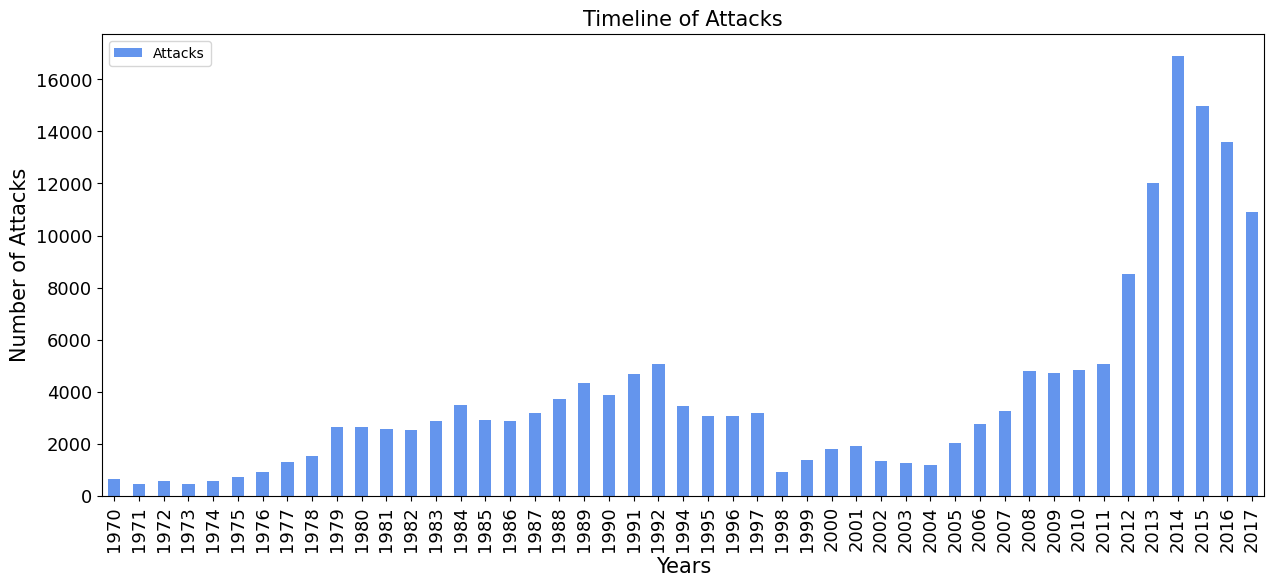

In [16]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(i)Most number of attacks(16903) in 2014
(ii)Least number of attacks(471) in 1971

In [17]:
#Total Casualties(Killed + Wounded) in each year

In [18]:
yc = df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

Casualty
Year          
1970     367.0
1971     119.0
1972     602.0
1973     621.0
1974    1135.0

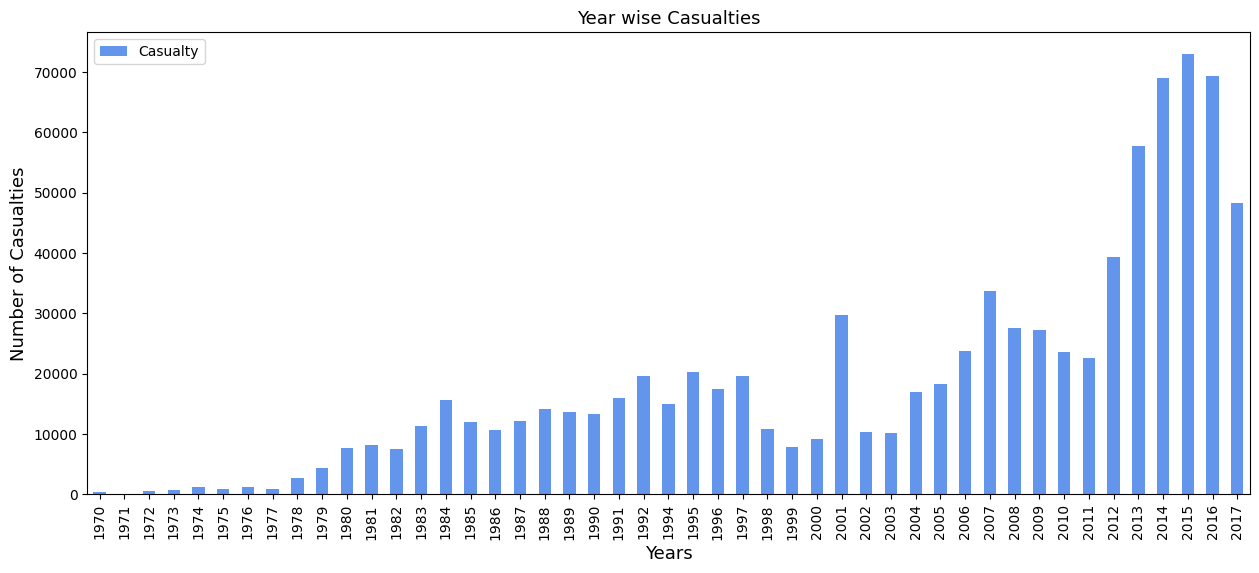

In [19]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3.Killed in each year

In [22]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

Killed
Year        
1970   174.0
1971   173.0
1972   566.0
1973   370.0
1974   539.0

4. Wounded in each Year

In [25]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

Wounded
Year         
1970    212.0
1971     82.0
1972    409.0
1973    495.0
1974    865.0

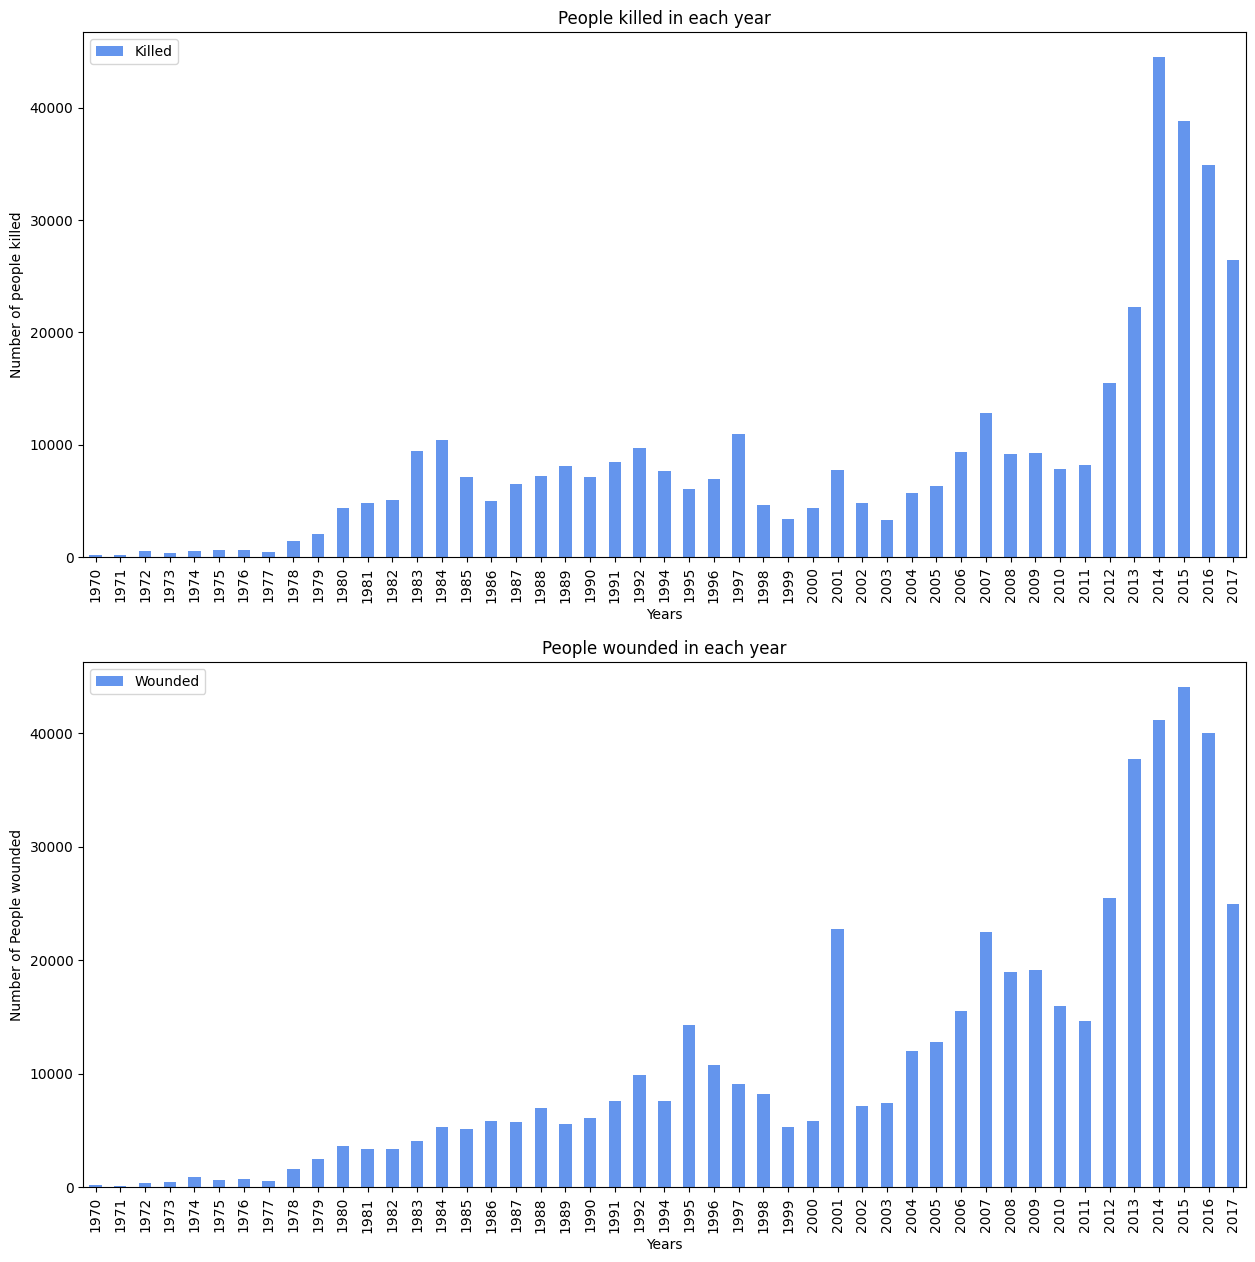

In [26]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People killed in each year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of people killed")

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People wounded in each year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People wounded")

plt.show()

# 2. Region wise Attacks

1. Distribution of Terrorist Attacks over Region from 1970-2017

In [27]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region  Australasia & Oceania  Central America & Caribbean  Central Asia  \
Year                                                                       
1970                        1                            7             0   
1971                        1                            5             0   
1972                        8                            3             0   
1973                        1                            6             0   
1974                        1                           11             0   

Region  East Asia  Eastern Europe  Middle East & North Africa  North America  \
Year                                                                           
1970            2              12                          28            472   
1971            1               5                          55            247   
1972            0               1                          53             73   
1973            2               1                          19             64   
1974            4               2                          42            111   

Region  South America  South Asia  Southeast Asia  Sub-Saharan Africa  \
Year                                                                    
1970               65           1              10                   3   
1971               24           0               6                   2   
1972               33           1              16                   4   
1973               83           1               2                   4   
1974               81           2               3                   7   

Region  Western Europe  
Year                    
1970                50  
1971               125  
1972               376  
1973               290  
1974               317

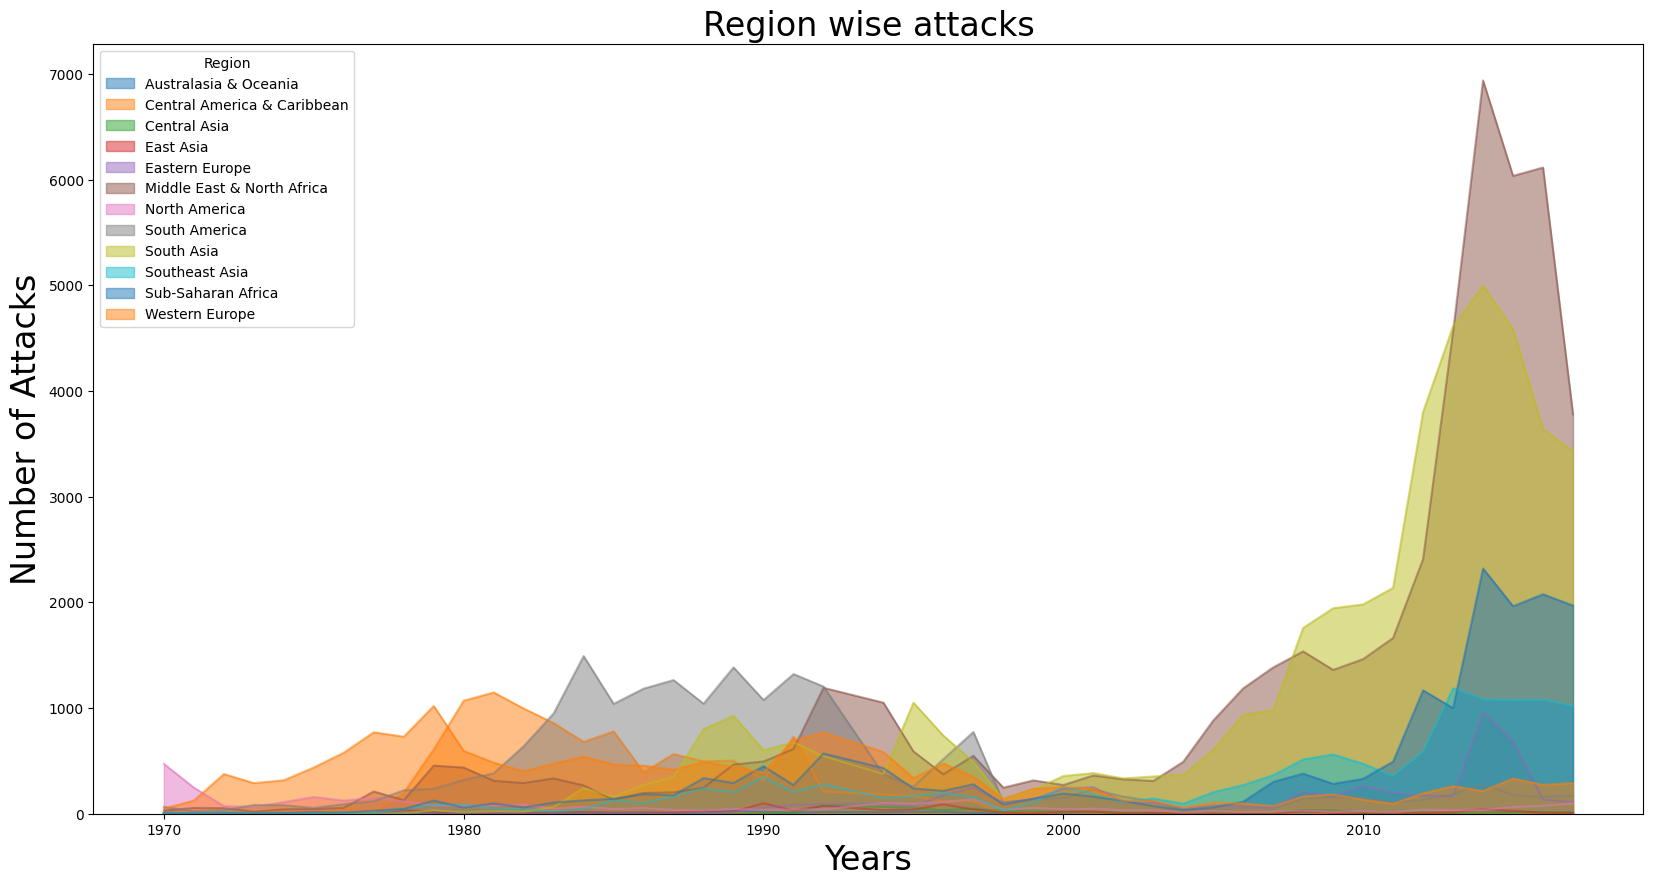

In [29]:
reg.plot(kind="area",stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=24)
plt.xlabel("Years",fontsize=24)
plt.ylabel("Number of Attacks",fontsize=24)
plt.show()

2. Total Terrorism attacks in each region from 1970-2017

In [36]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

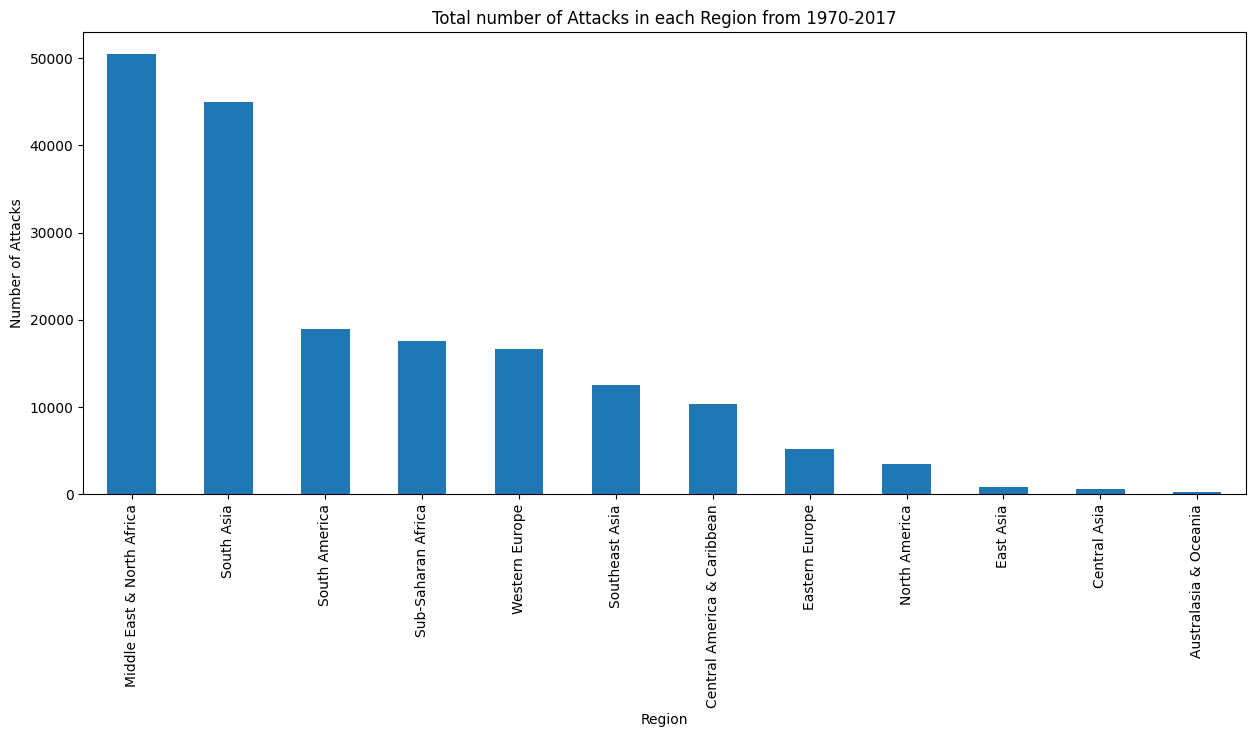

In [37]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

3. Total Casualties( Killed + Wounded ) in each region

In [40]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

Casualty
Region                               
Middle East & North Africa   330298.0
South Asia                   235083.0
Sub-Saharan Africa           109438.0
South America                 43662.0
Southeast Asia                40974.0
Central America & Caribbean   34594.0
North America                 26401.0
Western Europe                22943.0
Eastern Europe                18313.0
East Asia                     10054.0
Central Asia                   2973.0
Australasia & Oceania           410.0

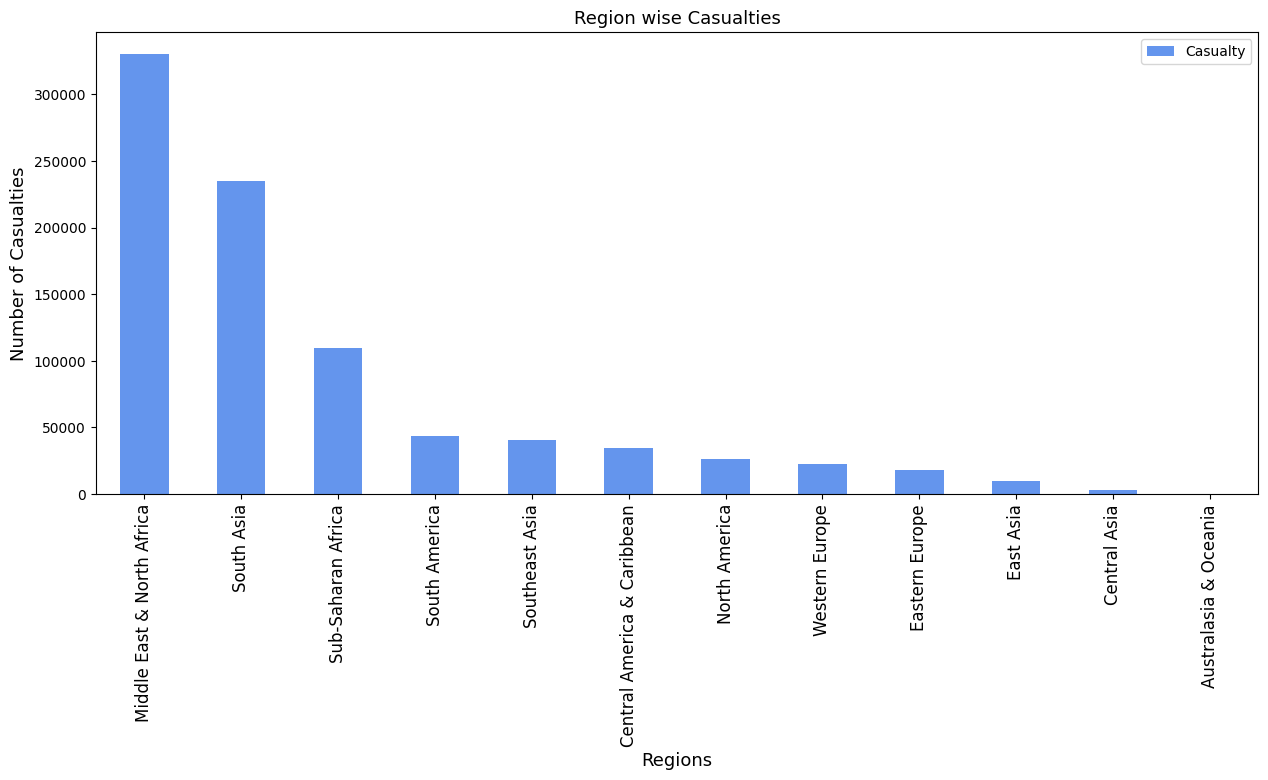

In [43]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

4.Killed in each Region

In [45]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

Killed
Region                               
Middle East & North Africa   137642.0
South Asia                   101319.0
Sub-Saharan Africa            78386.0
South America                 28849.0
Central America & Caribbean   28708.0
Southeast Asia                15637.0
Eastern Europe                 7415.0
Western Europe                 6694.0
North America                  4916.0
East Asia                      1152.0
Central Asia                   1000.0
Australasia & Oceania           150.0

5. Wounded in each Region

In [47]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

Wounded
Region                               
Middle East & North Africa   214308.0
South Asia                   141360.0
Sub-Saharan Africa            52857.0
Southeast Asia                26259.0
North America                 21531.0
Western Europe                18332.0
South America                 16704.0
Eastern Europe                12045.0
East Asia                      9213.0
Central America & Caribbean    8991.0
Central Asia                   2009.0
Australasia & Oceania           260.0

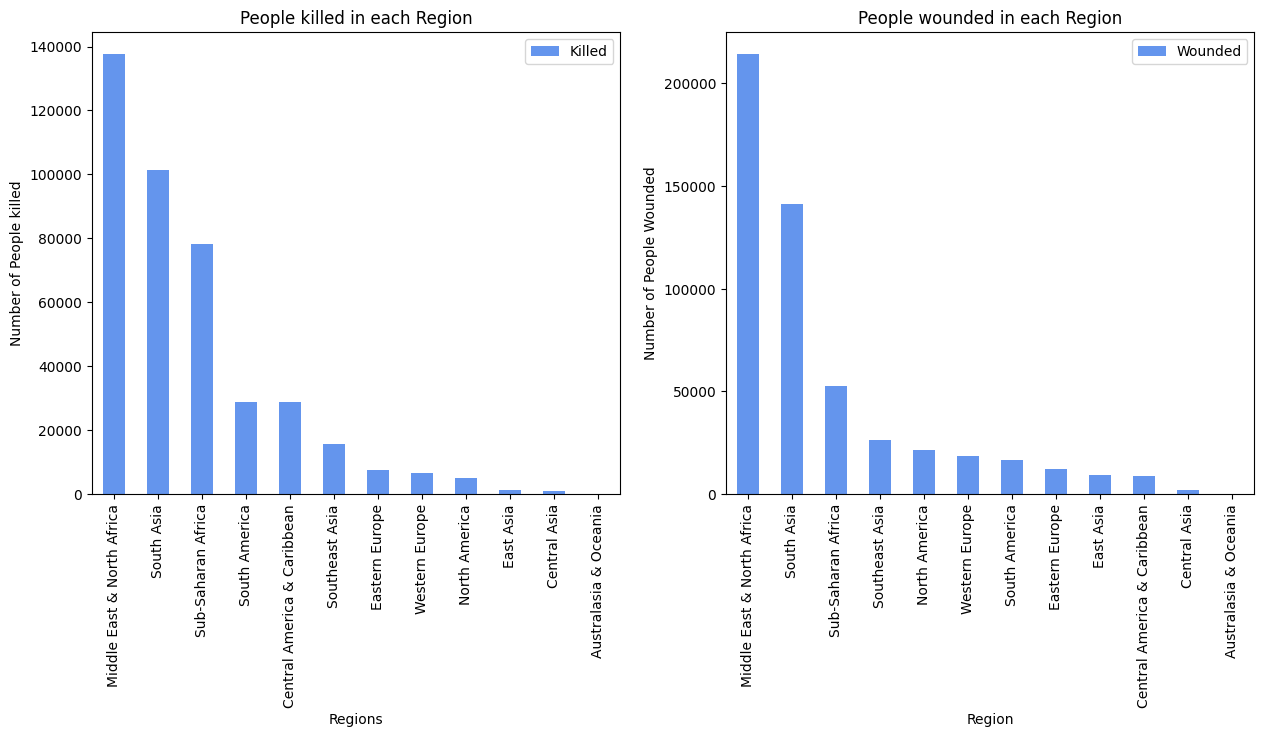

In [57]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People wounded in each Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Number of People Wounded")

plt.show()

# 3.Country Wise Attacks

1. Number of Attacks in each Country

In [58]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

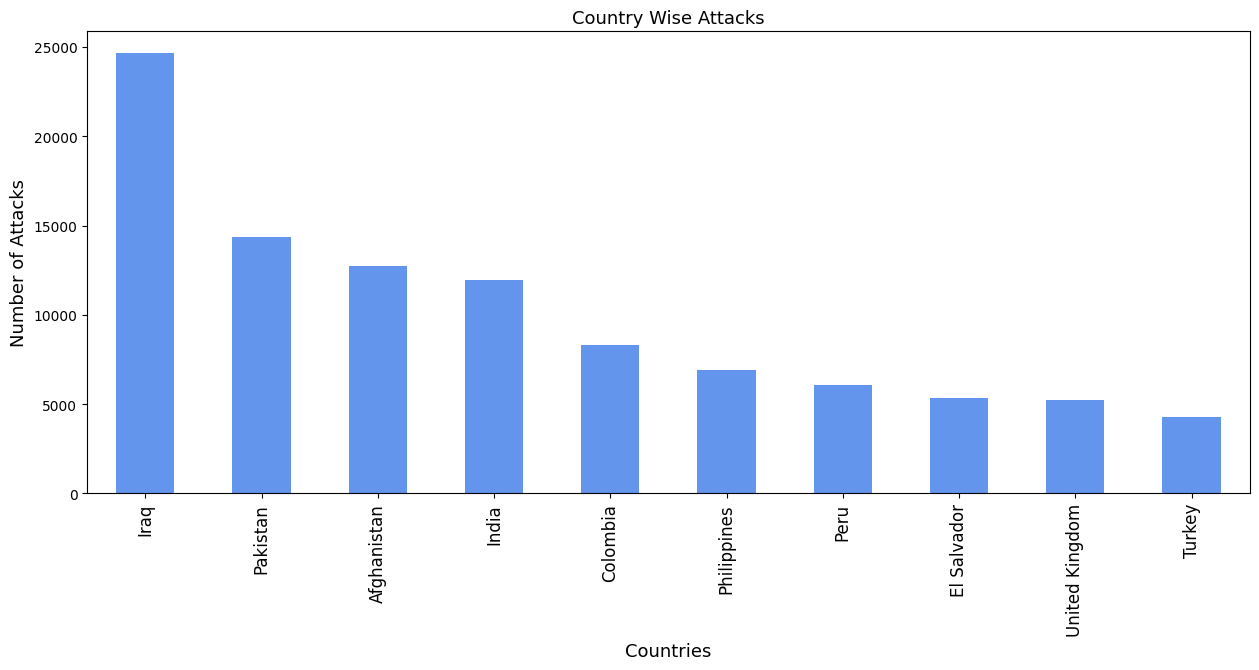

In [59]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country Wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total casualties (Killed + Wounded) in each Country.

In [60]:
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)

Casualty
Country                
Iraq           203059.0
Afghanistan     80291.0
Pakistan        64555.0
India           47238.0
Sri Lanka       29942.0
United States   24470.0
Colombia        23821.0
Philippines     22427.0
Nigeria         21769.0
Syria           21687.0

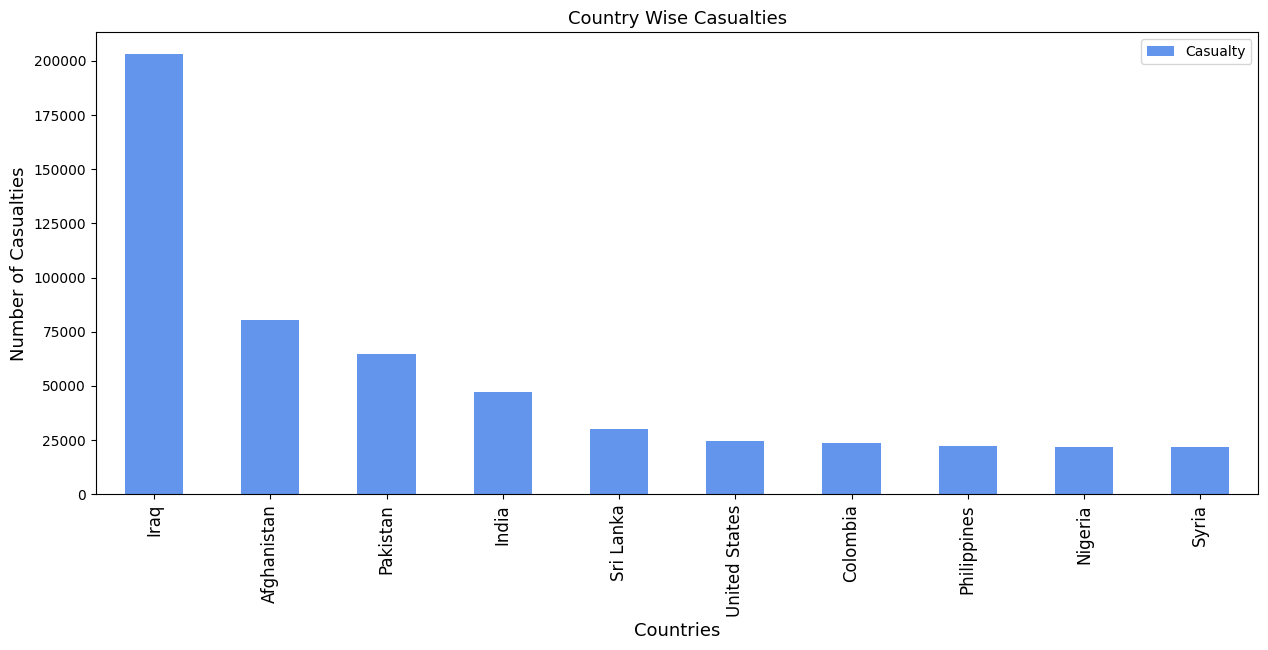

In [61]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country Wise Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed in each Country

In [62]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

Killed
Country             
Iraq         78589.0
Afghanistan  39384.0
Pakistan     23822.0
Nigeria      22682.0
India        19341.0
Sri Lanka    15530.0
Syria        15229.0
Colombia     14698.0
Peru         12771.0
El Salvador  12053.0

4. Wounded in each Country

In [63]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

Wounded
Country                
Iraq           134690.0
Afghanistan     44277.0
Pakistan        42038.0
India           28980.0
United States   20702.0
Sri Lanka       15561.0
Syria           14109.0
Philippines     13367.0
Lebanon         10904.0
Colombia        10328.0

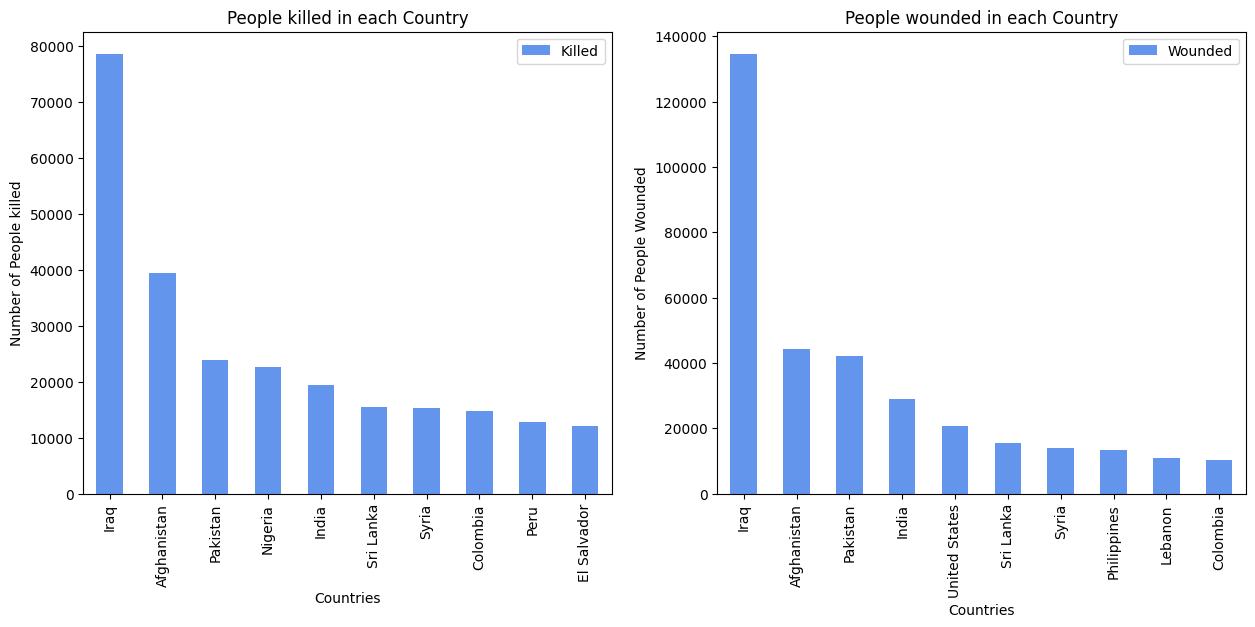

In [64]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show( )

# City Wise Attacks - Top 10

1. Number of Attacks in each city

In [65]:
city=df["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

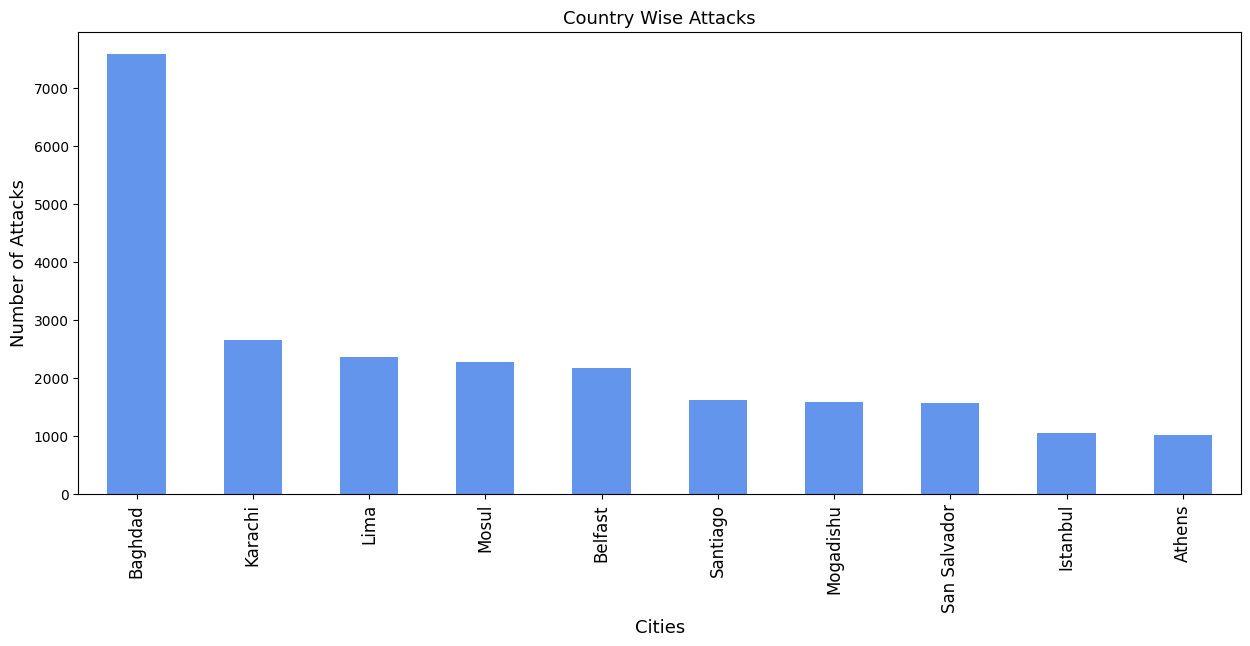

In [66]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country Wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties (Killed + Wounded)in each city

In [68]:
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

Casualty
City                   
Baghdad         76899.0
New York City   19619.0
Mosul           12367.0
Karachi          9225.0
Mogadishu        8614.0
Kabul            8406.0
Beirut           7226.0
Kirkuk           6508.0
Colombo          5852.0
Quetta           5589.0

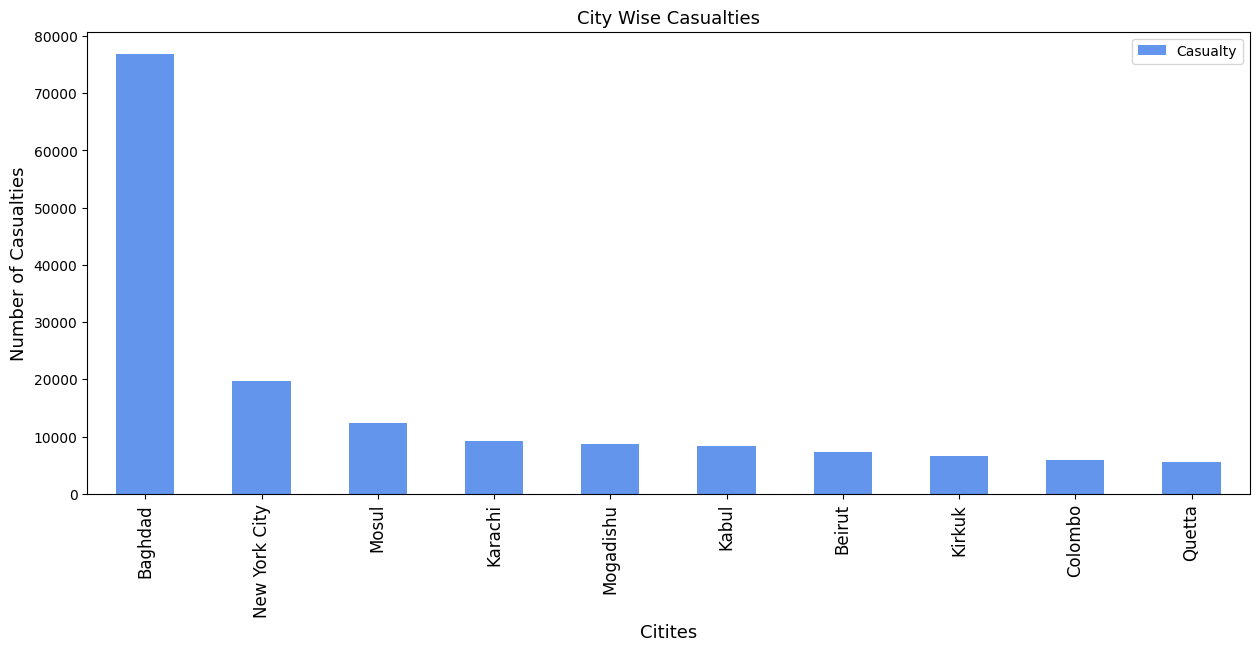

In [69]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City Wise Casualties",fontsize=13)
plt.xlabel("Citites",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3.Killed in each City

In [71]:
ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10)

Killed
City                  
Baghdad        21151.0
Mosul           7140.0
Mogadishu       3913.0
Karachi         3688.0
New York City   2838.0
Tikrit          2679.0
Kabul           2493.0
Ramadi          2313.0
Maiduguri       2235.0
Aleppo          2125.0

4. Wounded in each City

In [73]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10)

Wounded
City                  
Baghdad        56725.0
New York City  16781.0
Kabul           5973.0
Mosul           5787.0
Karachi         5688.0
Tokyo           5542.0
Beirut          5341.0
Nairobi         5024.0
Kirkuk          5008.0
Mogadishu       4955.0

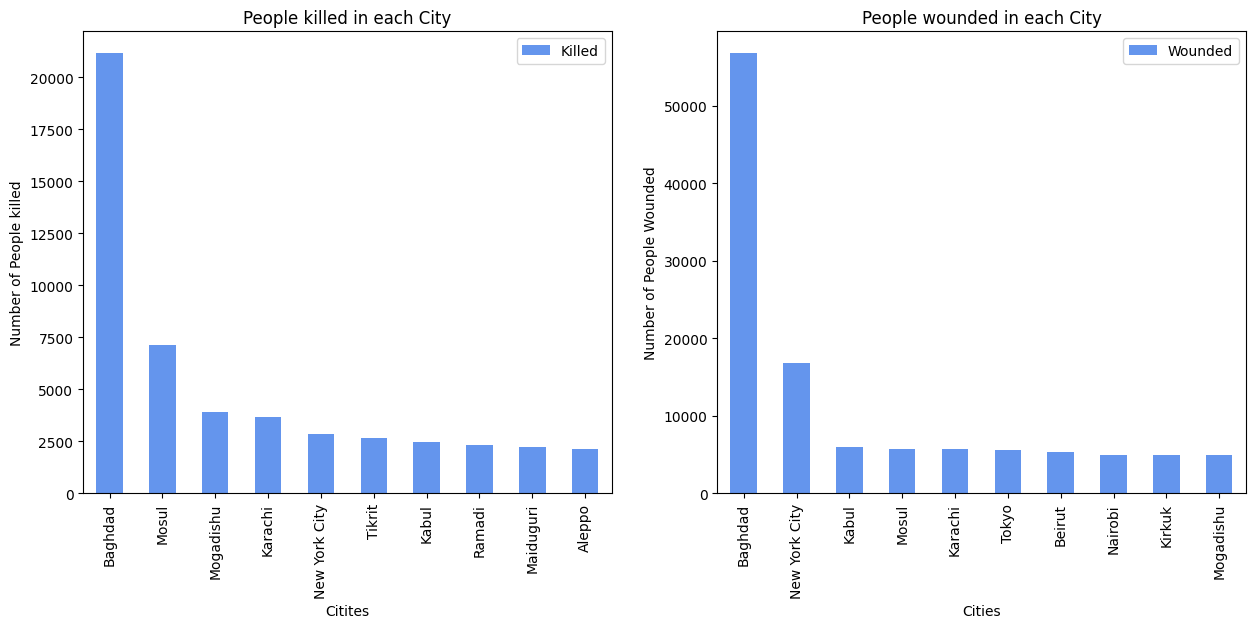

In [74]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People killed in each City")
ax0.set_xlabel("Citites")
ax0.set_ylabel("Number of People killed")

#Wounded
cw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show( )

# 5. Terrorists Group Wise Attacks - Top 10

1. Number of Attacks by each Group

In [78]:
grp=df["Group Name"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

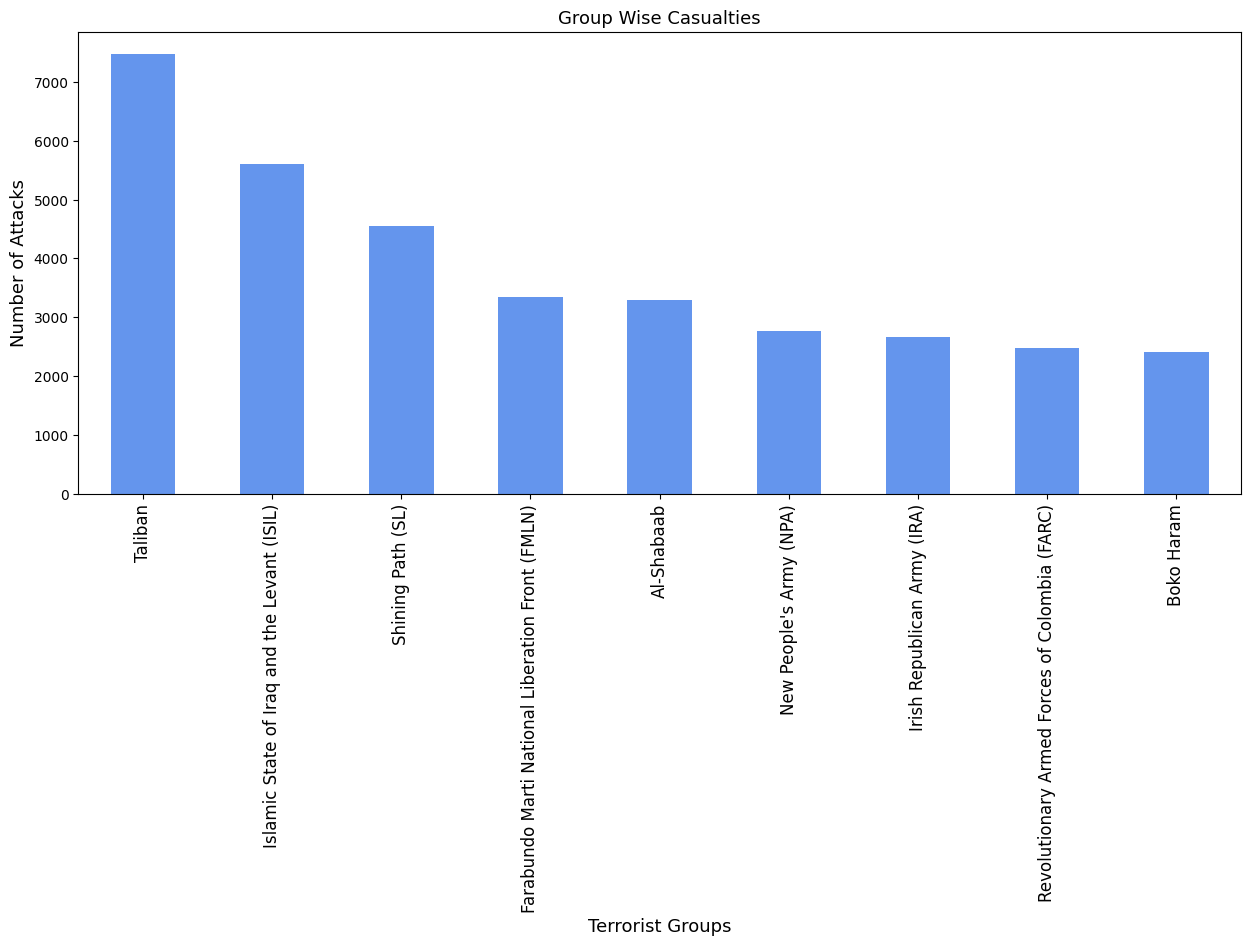

In [79]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group Wise Casualties",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties( Killed + Wounded) by each group

In [82]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10)

Casualty
Group Name                                                
Islamic State of Iraq and the Levant (ISIL)        58275.0
Taliban                                            54522.0
Al-Qaida                                           28340.0
Liberation Tigers of Tamil Eelam (LTTE)            21008.0
Boko Haram                                         20360.0
Tehrik-i-Taliban Pakistan (TTP)                    15314.0
Al-Shabaab                                         14565.0
Al-Qaida in Iraq                                   14419.0
Shining Path (SL)                                  14081.0
Farabundo Marti National Liberation Front (FMLN)   11457.0

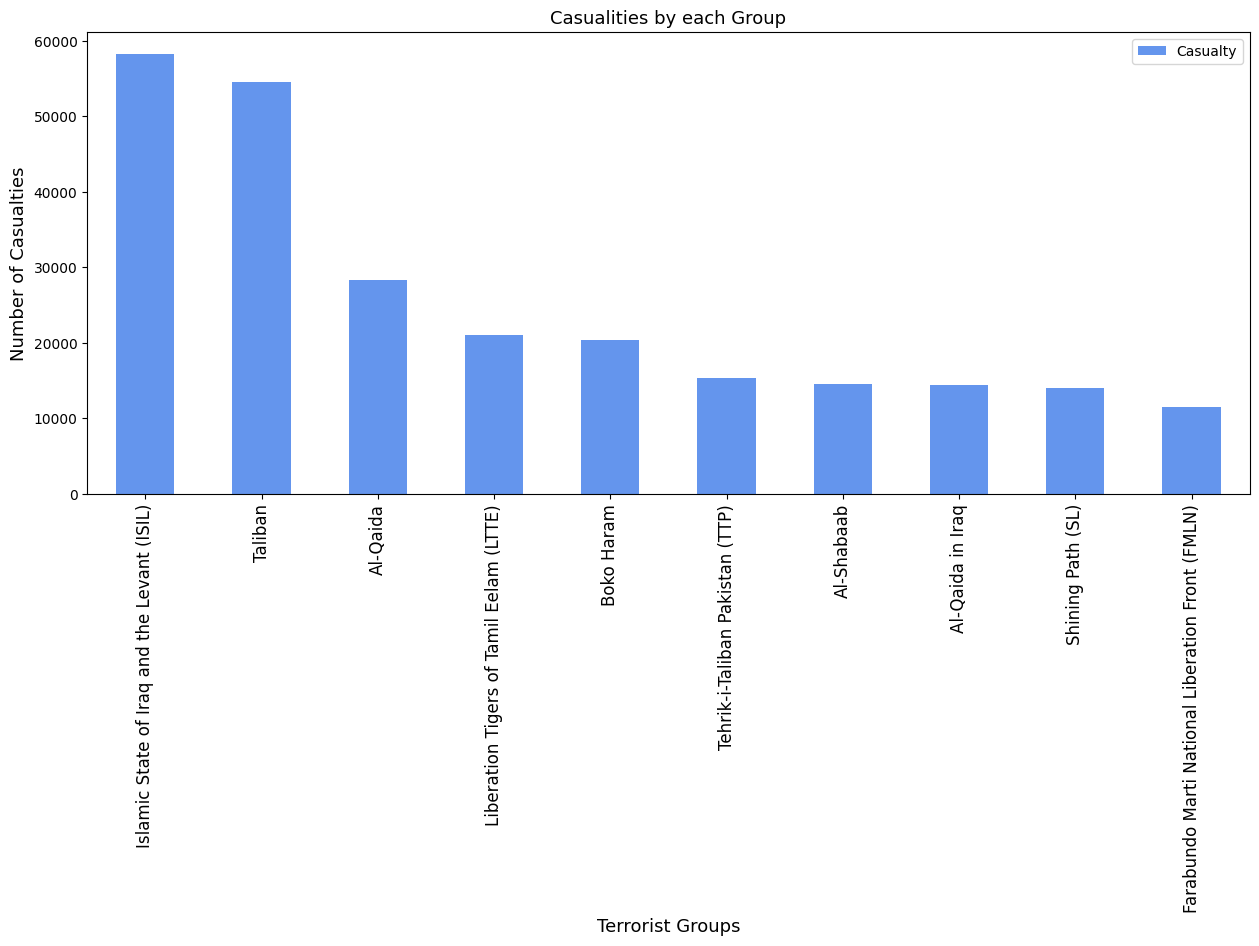

In [83]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualities by each Group" ,fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3.Killed by each Group

In [84]:
gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

Killed
Group Name                                               
Islamic State of Iraq and the Levant (ISIL)       38923.0
Taliban                                           29410.0
Boko Haram                                        20328.0
Shining Path (SL)                                 11601.0
Liberation Tigers of Tamil Eelam (LTTE)           10989.0
Al-Shabaab                                         9330.0
Farabundo Marti National Liberation Front (FMLN)   8065.0
Nicaraguan Democratic Force (FDN)                  6662.0
Tehrik-i-Taliban Pakistan (TTP)                    6042.0
Revolutionary Armed Forces of Colombia (FARC)      5661.0

4. Wounded by each Group

In [85]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

Wounded
Group Name                                          
Islamic State of Iraq and the Levant (ISIL)  30672.0
Taliban                                      27932.0
Al-Qaida                                     24512.0
Liberation Tigers of Tamil Eelam (LTTE)      11031.0
Al-Qaida in Iraq                             10343.0
Tehrik-i-Taliban Pakistan (TTP)               9532.0
Boko Haram                                    9473.0
Al-Shabaab                                    7624.0
Aum Shinri Kyo                                6003.0
Kurdistan Workers' Party (PKK)                4908.0

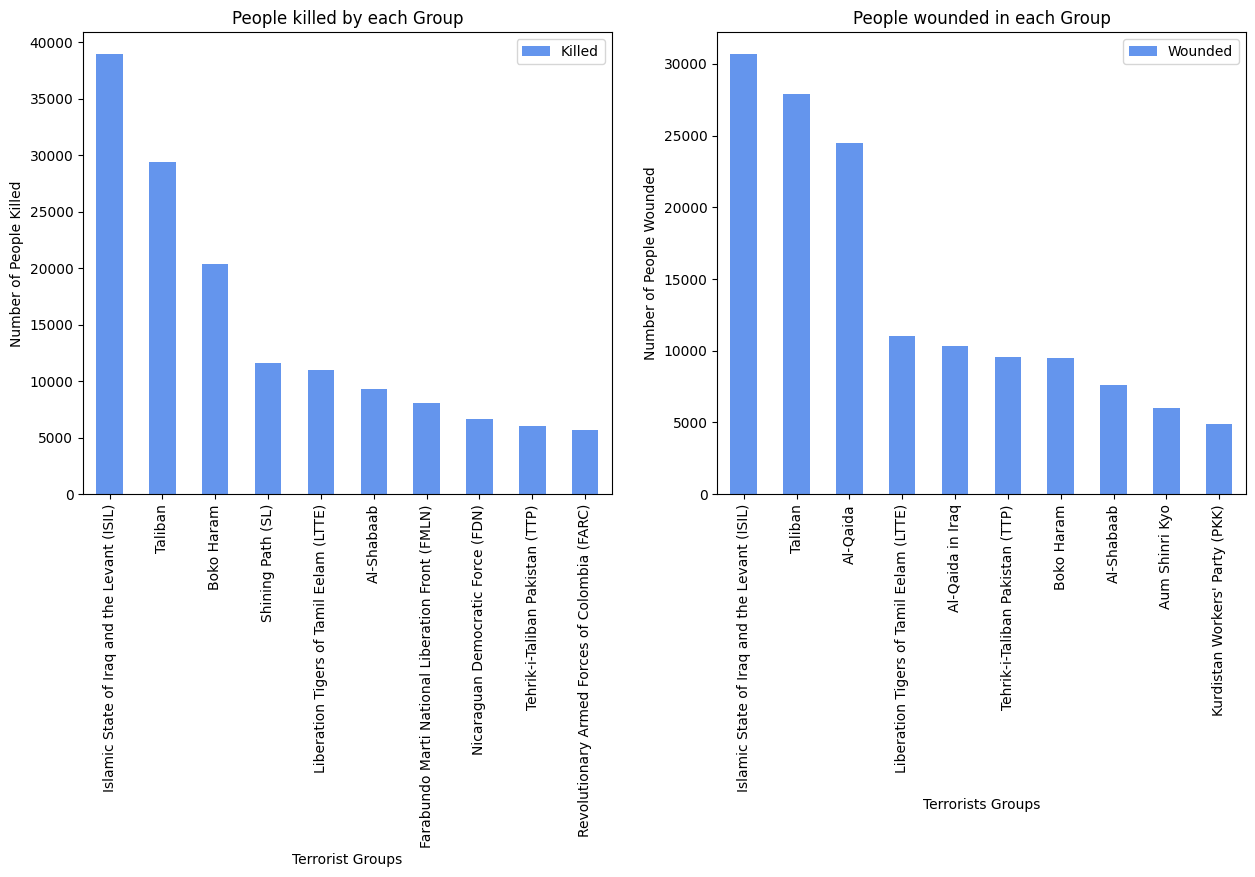

In [86]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of People Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People wounded in each Group")
ax1.set_xlabel("Terrorists Groups")
ax1.set_ylabel("Number of People Wounded")

plt.show( )

# 6. Attacktypes wise Attacks

1. Number of Attacks by each Attack Type

In [87]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

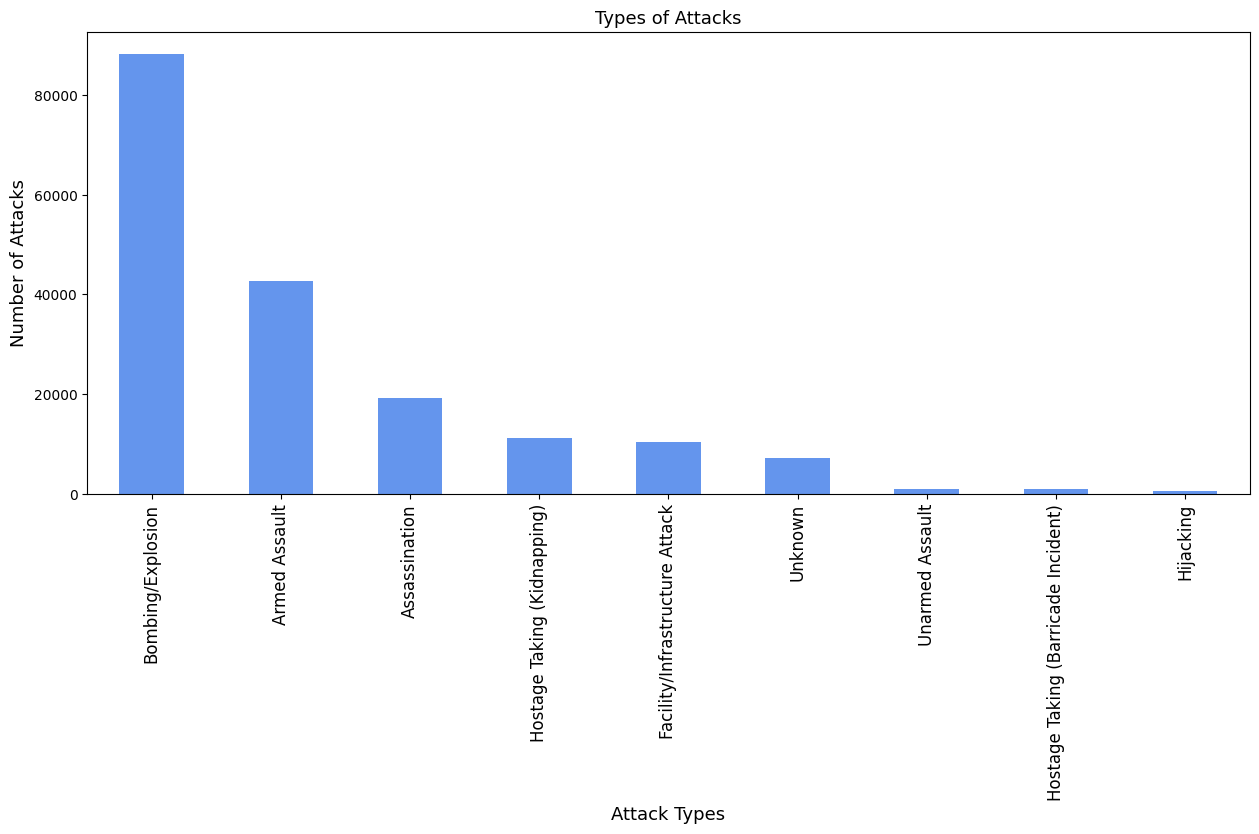

In [89]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks" ,fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties (Killed + Wounded) by each Attack Type

In [91]:
ac=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
ac

Casualty
Attack Type                                  
Bombing/Explosion                    515176.0
Armed Assault                        212759.0
Assassination                         37242.0
Hijacking                             20647.0
Hostage Taking (Kidnapping)           20579.0
Unarmed Assault                       14823.0
Hostage Taking (Barricade Incident)    7491.0
Facility/Infrastructure Attack         6347.0

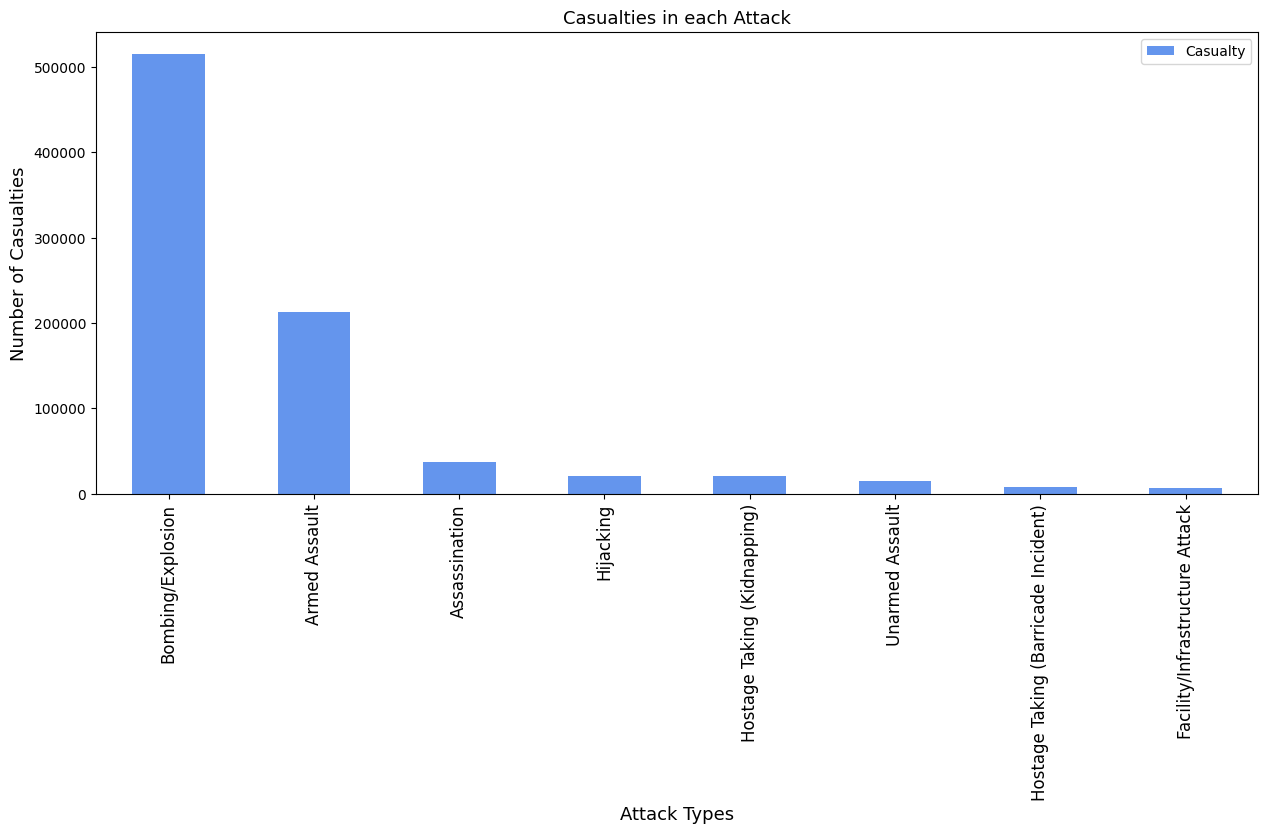

In [92]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack" ,fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed by each Attack Type

In [93]:
ak=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ak

Killed
Attack Type                                  
Armed Assault                        160297.0
Bombing/Explosion                    157321.0
Assassination                         24920.0
Hostage Taking (Kidnapping)           24231.0
Hostage Taking (Barricade Incident)    4478.0
Hijacking                              3718.0
Facility/Infrastructure Attack         3642.0
Unarmed Assault                         880.0

4. Wounded by each Attack Type

In [94]:
aw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
aw

Wounded
Attack Type                                  
Bombing/Explosion                    372686.0
Armed Assault                         77366.0
Hijacking                             17001.0
Unarmed Assault                       14027.0
Assassination                         13887.0
Hostage Taking (Kidnapping)            6446.0
Hostage Taking (Barricade Incident)    3966.0
Facility/Infrastructure Attack         3765.0

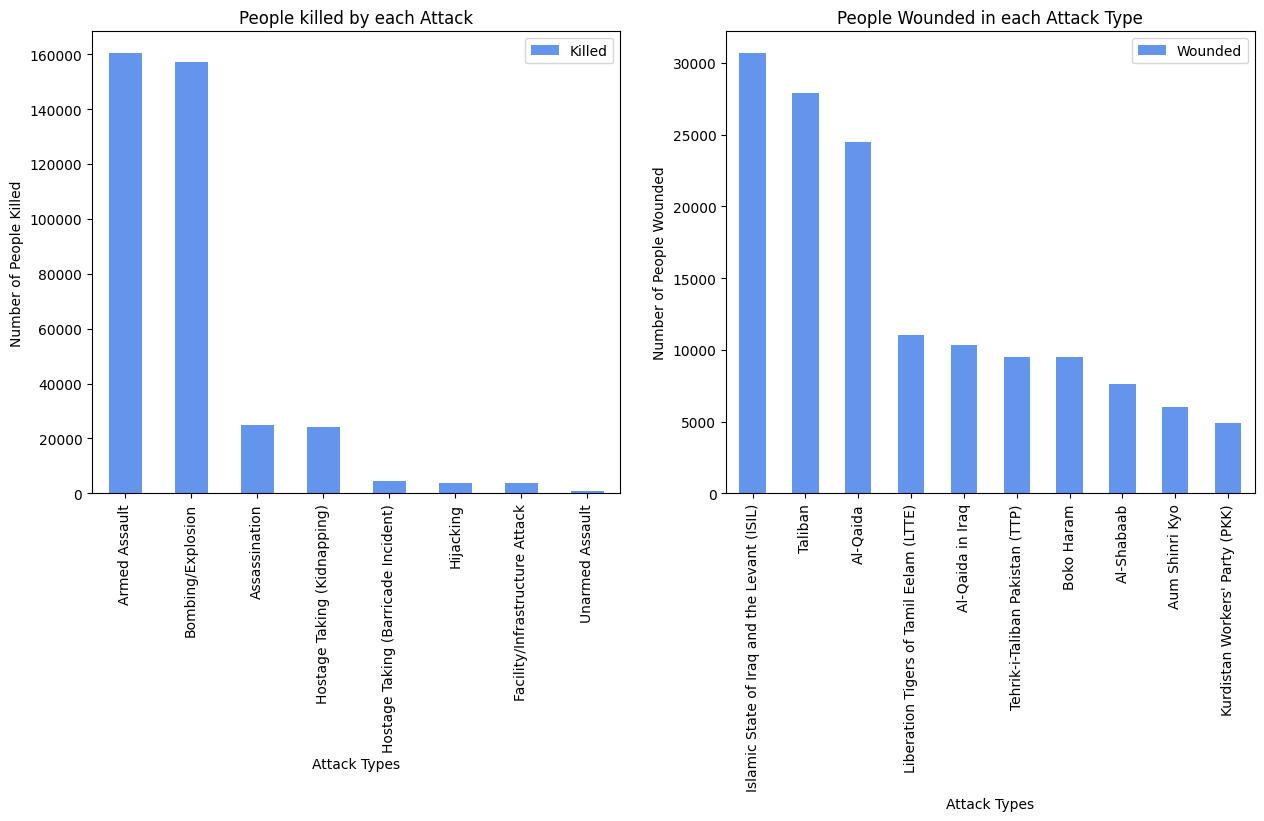

In [95]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People killed by each Attack")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of People Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of People Wounded")

plt.show( )

# 7. Target Type wise Attacks

1. Number of Attacks over each Target Type

In [96]:
ta=df["Target Type"].value_counts()
ta

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

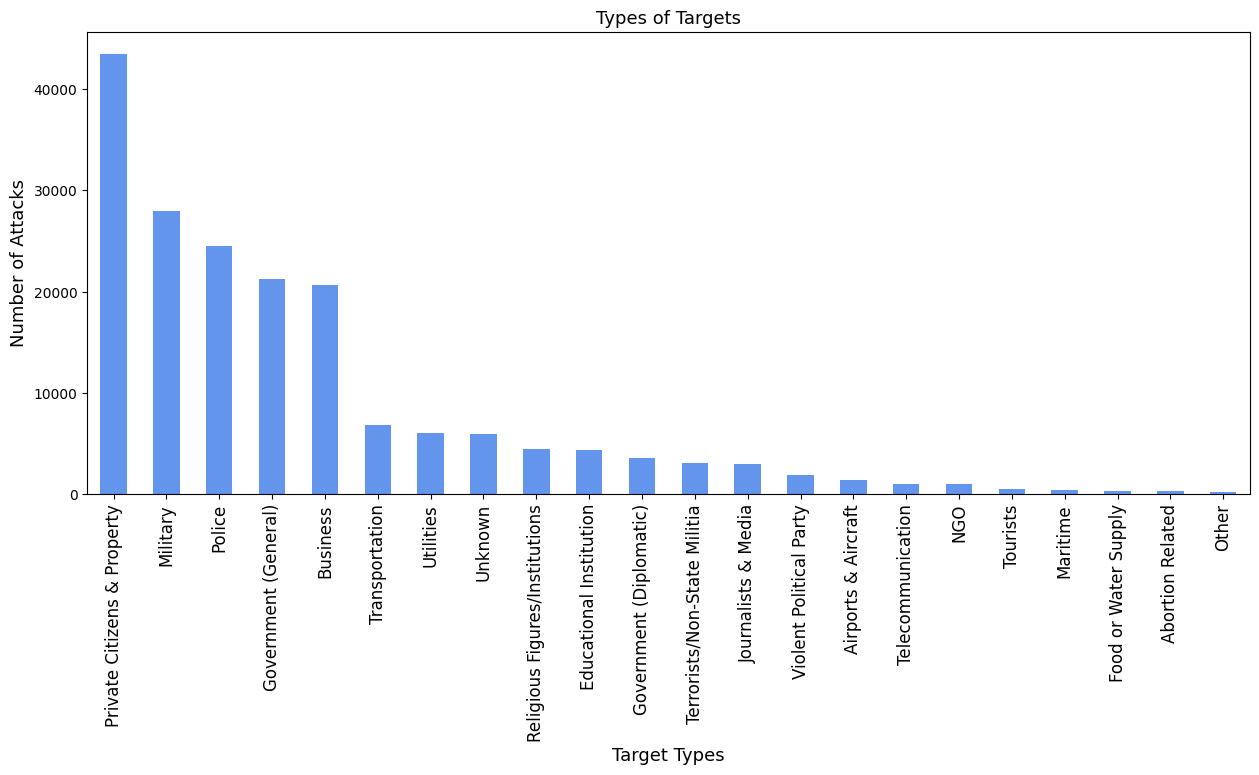

In [97]:
ta.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Targets" ,fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [98]:
tc=df[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
tc

Casualty
Target Type                             
Private Citizens & Property     295951.0
Military                        155750.0
Police                          113690.0
Business                         75684.0
Government (General)             65064.0
Transportation                   53928.0
Religious Figures/Institutions   36045.0
Terrorists/Non-State Militia     15637.0
Educational Institution          13587.0
Government (Diplomatic)          13150.0
Violent Political Party           8649.0
Airports & Aircraft               6869.0
Journalists & Media               3105.0
Utilities                         2746.0
Tourists                          1996.0
Maritime                          1965.0
NGO                               1814.0
Telecommunication                  677.0
Other                              606.0
Food or Water Supply               501.0
Abortion Related                    56.0

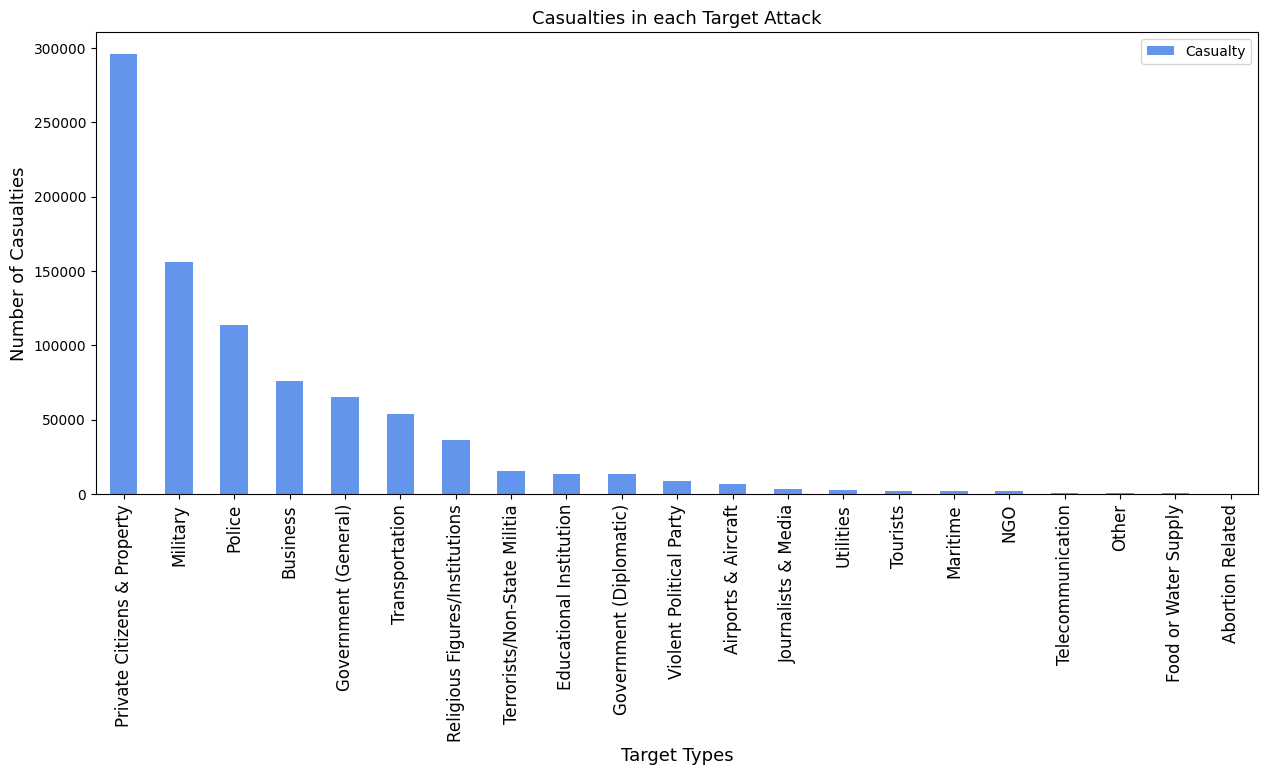

In [99]:
tc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Target Attack" ,fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [100]:
tk=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
tk

Killed
Target Type                             
Private Citizens & Property     140504.0
Military                        106047.0
Police                           53704.0
Government (General)             26071.0
Business                         23487.0
Transportation                   13916.0
Religious Figures/Institutions   13413.0
Terrorists/Non-State Militia      9088.0
Airports & Aircraft               3767.0
Educational Institution           3745.0
Violent Political Party           3617.0
Government (Diplomatic)           3039.0
Utilities                         1874.0
Journalists & Media               1501.0
Maritime                          1191.0
NGO                               1057.0
Tourists                           758.0
Food or Water Supply               313.0
Other                              255.0
Telecommunication                  182.0
Abortion Related                    10.0

In [101]:
tw=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
tw

Wounded
Target Type                             
Private Citizens & Property     178672.0
Military                         71038.0
Police                           64703.0
Business                         54531.0
Government (General)             41184.0
Transportation                   40679.0
Religious Figures/Institutions   24477.0
Government (Diplomatic)          10359.0
Educational Institution          10227.0
Terrorists/Non-State Militia      8223.0
Violent Political Party           5303.0
Airports & Aircraft               3478.0
Journalists & Media               1796.0
Utilities                         1353.0
Tourists                          1290.0
Maritime                           908.0
NGO                                893.0
Telecommunication                  497.0
Other                              419.0
Food or Water Supply               234.0
Abortion Related                    46.0

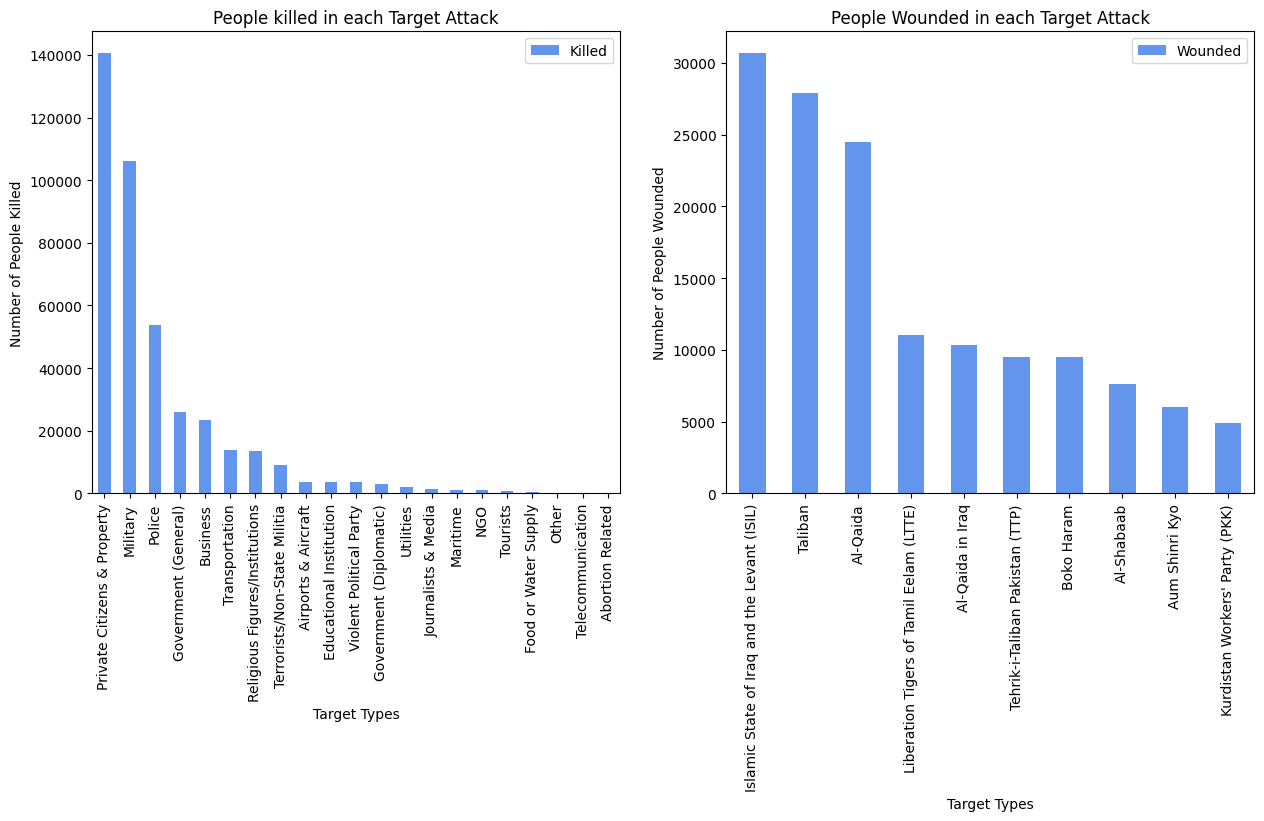

In [102]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of People Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of People Wounded")

plt.show( )

# 8. Group + Country wise - Top 10

1. Sorting by number of Attacks

In [105]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9504\390661980.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

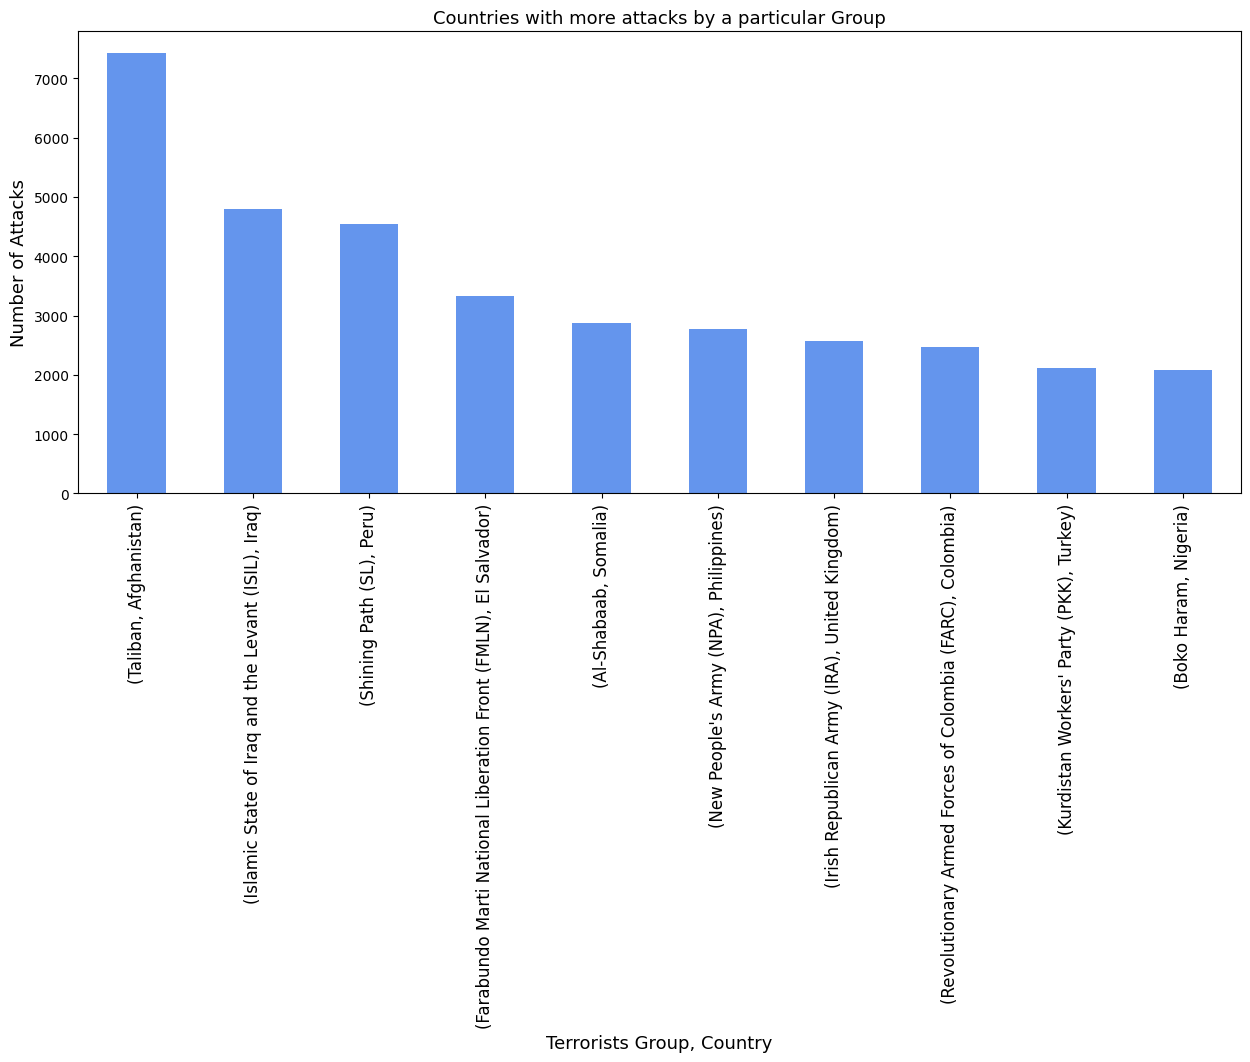

In [106]:
gca.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with more attacks by a particular Group" ,fontsize=13)
plt.xlabel("Terrorists Group, Country",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Sorting by number of Casualties

In [115]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gcc

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9504\2668093037.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)


Casualty
Group Name                                       Country                
Taliban                                          Afghanistan     54323.0
Islamic State of Iraq and the Levant (ISIL)      Iraq            47328.0
Liberation Tigers of Tamil Eelam (LTTE)          Sri Lanka       20907.0
Al-Qaida                                         United States   19494.0
Boko Haram                                       Nigeria         16343.0
Tehrik-i-Taliban Pakistan (TTP)                  Pakistan        15272.0
Shining Path (SL)                                Peru            14074.0
Al-Qaida in Iraq                                 Iraq            14043.0
Al-Shabaab                                       Somalia         12039.0
Farabundo Marti National Liberation Front (FMLN) El Salvador     11395.0

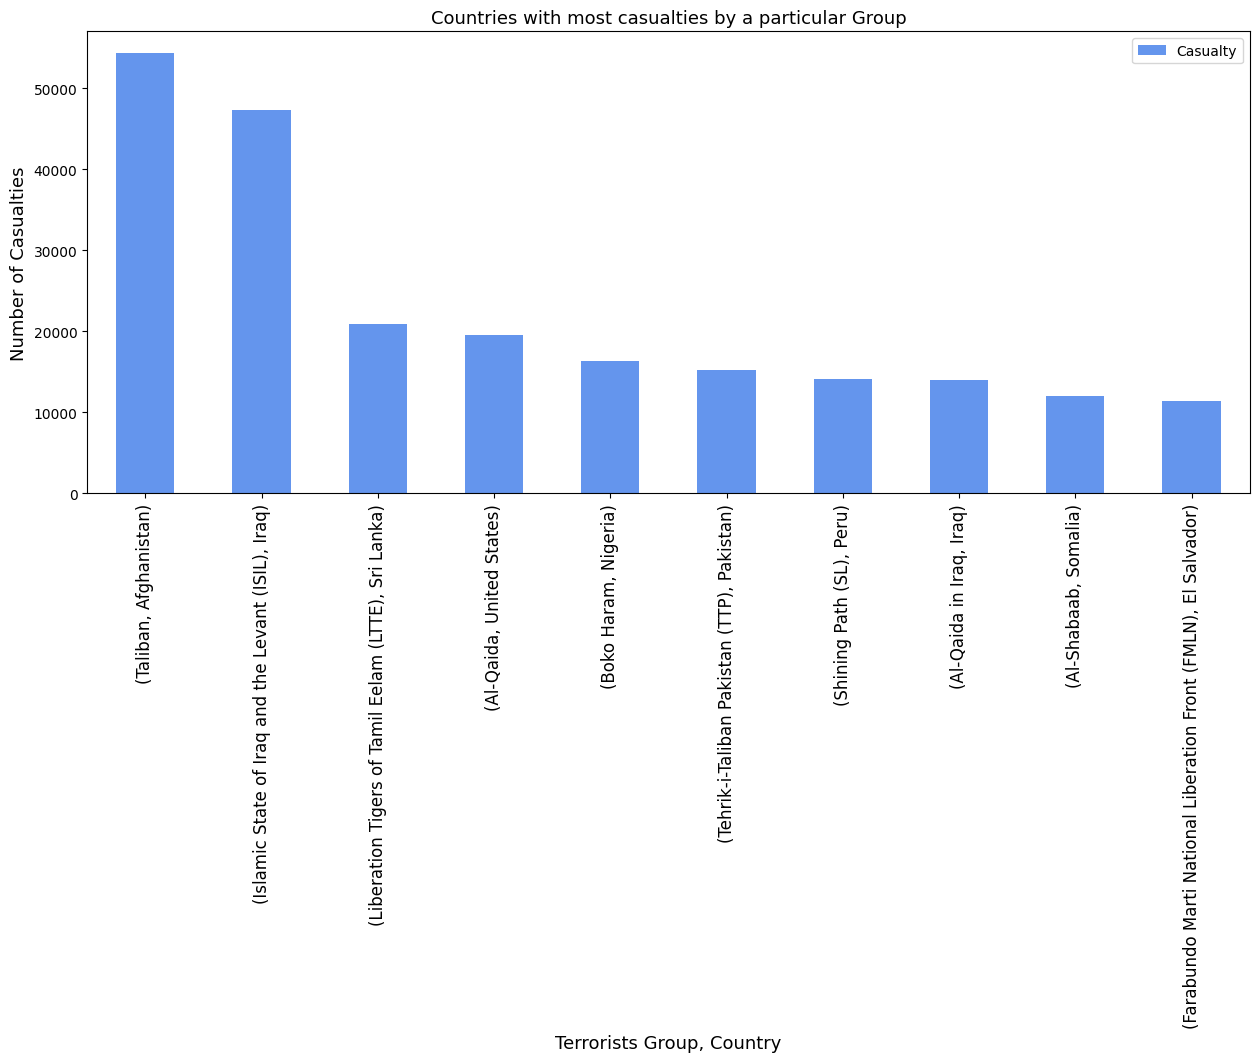

In [116]:
gcc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group" ,fontsize=13)
plt.xlabel("Terrorists Group, Country",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Sorting by Number of People Killed

In [117]:
gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
gck

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9504\3452644615.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)


Killed
Group Name                                       Country             
Islamic State of Iraq and the Levant (ISIL)      Iraq         31058.0
Taliban                                          Afghanistan  29269.0
Boko Haram                                       Nigeria      16917.0
Shining Path (SL)                                Peru         11595.0
Liberation Tigers of Tamil Eelam (LTTE)          Sri Lanka    10928.0
Al-Shabaab                                       Somalia       8176.0
Farabundo Marti National Liberation Front (FMLN) El Salvador   8019.0
Islamic State of Iraq and the Levant (ISIL)      Syria         6883.0
Nicaraguan Democratic Force (FDN)                Nicaragua     6630.0
Tehrik-i-Taliban Pakistan (TTP)                  Pakistan      6014.0

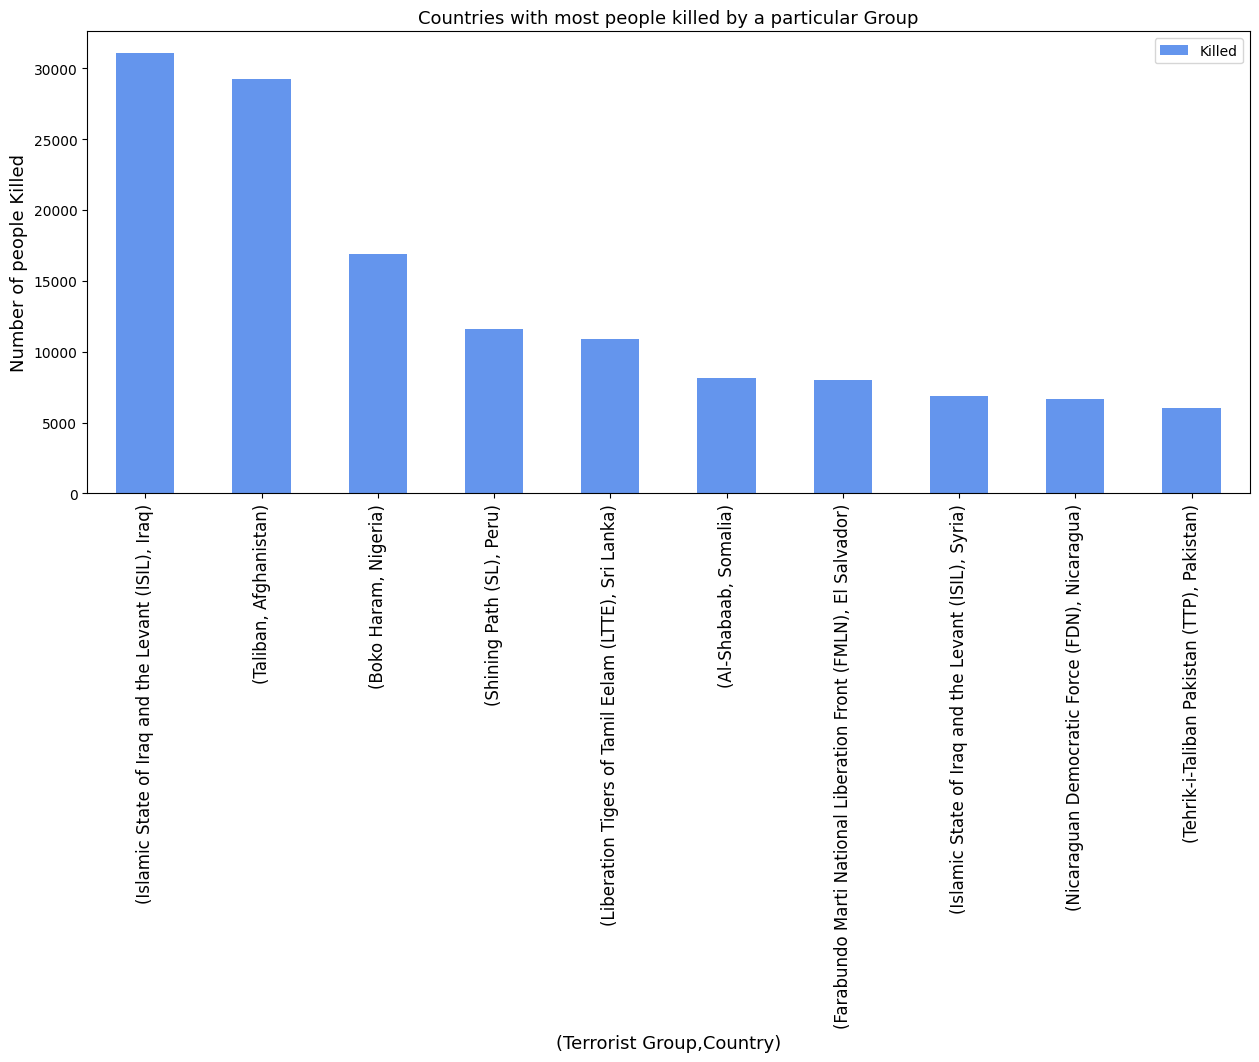

In [118]:
gck.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

4.Sorting by Number of People Wounded

In [119]:
gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gcw

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9504\1046759477.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)


Wounded
Group Name                                  Country               
Taliban                                     Afghanistan    27871.0
Islamic State of Iraq and the Levant (ISIL) Iraq           23697.0
Al-Qaida                                    United States  16493.0
Liberation Tigers of Tamil Eelam (LTTE)     Sri Lanka      10991.0
Al-Qaida in Iraq                            Iraq           10075.0
Tehrik-i-Taliban Pakistan (TTP)             Pakistan        9518.0
Boko Haram                                  Nigeria         7671.0
Al-Shabaab                                  Somalia         6025.0
Aum Shinri Kyo                              Japan           6003.0
Kurdistan Workers' Party (PKK)              Turkey          4795.0

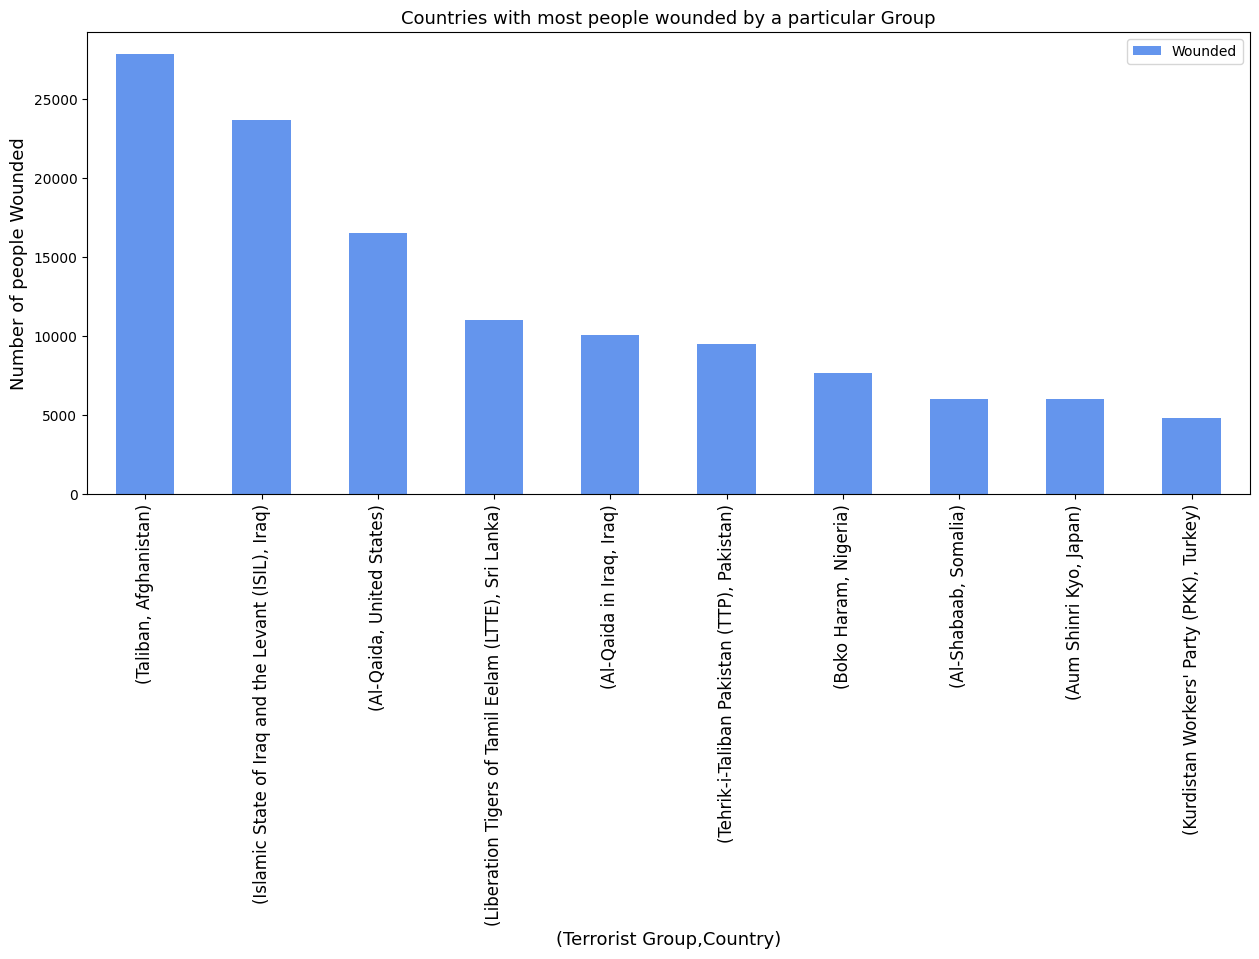

In [120]:
gcw.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

# 9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017

1.Total Casualties (Killed + Wounded) due to Terrorist Attacks

In [121]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 875143.0


2. Killed due to Terrorists Attacks

In [122]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)


Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0


3. Wounded due to Terrorists Attacks

In [123]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)


Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0


# 10. Obserbvations